In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
employee_df = pd.read_excel('C:/Users/aniqo/Projects/Employee Survey/data.xlsx')

In [3]:
# View the top 5 rows of the dataset
employee_df.head()

,Response ID,Status,Department,Director,Manager,Supervisor,Staff,Question,Response,Response Text
0,1,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
1,2,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,4.0,Strongly Agree
2,3,Complete,Parks and Recreation,0,1,0,0,1. I know what is expected of me at work,0.0,Not Applicable
3,4,Complete,Human Resources,0,1,0,0,1. I know what is expected of me at work,3.0,Agree
4,5,Complete,Communications Office,0,0,0,0,1. I know what is expected of me at work,0.0,Not Applicable


In [4]:
# Identify the number of rows, columns, and data types
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14725 entries, 0 to 14724
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Response ID    14725 non-null  int64  
 1   Status         14725 non-null  object 
 2   Department     14725 non-null  object 
 3   Director       14725 non-null  int64  
 4   Manager        14725 non-null  int64  
 5   Supervisor     14725 non-null  int64  
 6   Staff          14725 non-null  int64  
 7   Question       14725 non-null  object 
 8   Response       14590 non-null  float64
 9   Response Text  14590 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.1+ MB


The dataset consists of 14.725 records and 10 fields

In [5]:
# Identify duplicate data
employee_df.duplicated().sum()

15

The dataset has 15 duplicate records

In [6]:
# Handle duplicate data
employee_df.drop_duplicates(inplace=True)

In [7]:
employee_df.shape

(14710, 10)

The total number of records is reduced to 14.710.

In [8]:
# Identify missing values
employee_df.isnull().sum()

Response ID        0
Status             0
Department         0
Director           0
Manager            0
Supervisor         0
Staff              0
Question           0
Response         135
Response Text    135
dtype: int64

In [9]:
# Handle missing values
employee_df['Response'].fillna(0, inplace=True)
employee_df['Response Text'].fillna("NaN", inplace=True)

In [10]:
employee_df.isna().sum()

Response ID      0
Status           0
Department       0
Director         0
Manager          0
Supervisor       0
Staff            0
Question         0
Response         0
Response Text    0
dtype: int64

Fill missing values with 0 and "NaN".

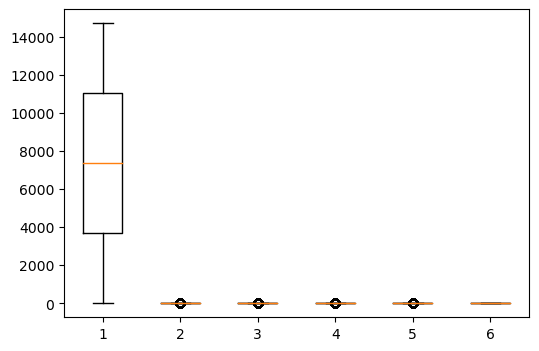

In [11]:
# Identify outliers in numerical variables
plt.figure(figsize=(6,4))
plt.boxplot(employee_df.select_dtypes(include='number'))
plt.show()

In [12]:
# Perform descriptive analytics on numerical variables
employee_df.describe()

,Response ID,Director,Manager,Supervisor,Staff,Response
count,14710.000000,14710.000000,14710.000000,14710.000000,14710.000000,14710.000000
mean,7355.500000,0.011557,0.072740,0.112848,0.084976,2.956492
std,4246.555565,0.106883,0.259717,0.316418,0.278856,1.054828
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3678.250000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7355.500000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,11032.750000,0.000000,0.000000,0.000000,0.000000,4.000000
max,14710.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Do not perform any processing on outlier data, as it is considered a specific pattern.

In [13]:
# Identify unique values in categorical variable
employee_df['Status'].unique()

array(['Complete', 'Incomplete'], dtype=object)

In [14]:
# Identify unique values in categorical variable
employee_df['Department'].unique()

array(['Human Resources', 'Communications Office', 'Parks and Recreation',
       "Prosecuting Attorney's Office",
       'Finance and Performance Management', 'Planning and Public Works',
       'Human Services', "Sheriff's Department",
       "Assessor-Treasurer's Office", 'District Court', 'Superior Court',
       'Medical Examiner', 'Assigned Council', 'Facilities Management',
       'Emergency Management', "Council's Office",
       'Clerk of Superior Court', 'Juvenile Court',
       'Exec Office & Directors', 'Family Justice Center',
       'Economic Development'], dtype=object)

In [15]:
# Identify unique values in categorical variable
employee_df['Question'].unique()

array(['1. I know what is expected of me at work',
       '2. At work, I have the opportunity to do what I do best every day',
       '3. In the last seven days, I have received recognition or praise for doing good work',
       '4. My supervisor, or someone at work, seems to care about me as a person',
       '5. The mission or purpose of our organization makes me feel my job is important',
       '6. I have a best friend at work',
       '7. This last year, I have had opportunities at work to learn and grow',
       '7. This last year, I have had opportunities at work to learn & grow',
       '8. My supervisor holds employees accountable for performance',
       '9. My department is inclusive and demonstrates support of a diverse workforce',
       '10. Overall I am satisfied with my job',
       '10. Overall I am satisfied with my job '], dtype=object)

Actually, there are only 10 questions, but variations in typing have resulted in 12 recorded questions.

In [16]:
# Uniforming questions
def uniforming_questions(questions):
  questions = questions.strip()  
  questions = questions.replace("&", "and")
  return questions

employee_df['Question'] = employee_df['Question'].apply(uniforming_questions)

In [17]:
employee_df['Question'].unique()

array(['1. I know what is expected of me at work',
       '2. At work, I have the opportunity to do what I do best every day',
       '3. In the last seven days, I have received recognition or praise for doing good work',
       '4. My supervisor, or someone at work, seems to care about me as a person',
       '5. The mission or purpose of our organization makes me feel my job is important',
       '6. I have a best friend at work',
       '7. This last year, I have had opportunities at work to learn and grow',
       '8. My supervisor holds employees accountable for performance',
       '9. My department is inclusive and demonstrates support of a diverse workforce',
       '10. Overall I am satisfied with my job'], dtype=object)

In [18]:
# Identify unique values in categorical variable
employee_df['Response Text'].unique()

array(['Strongly Agree', 'Not Applicable', 'Agree', 'Disagree',
       'Strongly Disagree', 'NaN'], dtype=object)

In [19]:
# Perform descriptive analytics on all variables
employee_df.describe(include='all')

,Response ID,Status,Department,Director,Manager,Supervisor,Staff,Question,Response,Response Text
count,14710.000000,14710,14710,14710.000000,14710.000000,14710.000000,14710.000000,14710,14710.000000,14710
unique,NaN,2,21,NaN,NaN,NaN,NaN,10,NaN,6
top,NaN,Complete,Planning and Public Works,NaN,NaN,NaN,NaN,1. I know what is expected of me at work,NaN,Agree
freq,NaN,14575,4700,NaN,NaN,NaN,NaN,1471,NaN,5731
mean,7355.500000,NaN,NaN,0.011557,0.072740,0.112848,0.084976,NaN,2.956492,NaN
std,4246.555565,NaN,NaN,0.106883,0.259717,0.316418,0.278856,NaN,1.054828,NaN
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,3678.250000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN
50%,7355.500000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN
75%,11032.750000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,4.000000,NaN


- There are 14,710 employee records
- 99% of employees have completed the survey.
- 21 departments participated in the survey, with 31% coming from the Planning and Public Works department.
- The survey was conducted for employees from director to staff positions.
- There are 10 questions in the survey.
- Employees could provide ratings of 0, 1, 2, 3, 4 representing responses of not applicable, strongly disagree, disagree, agree, and strongly agree with the questions asked.

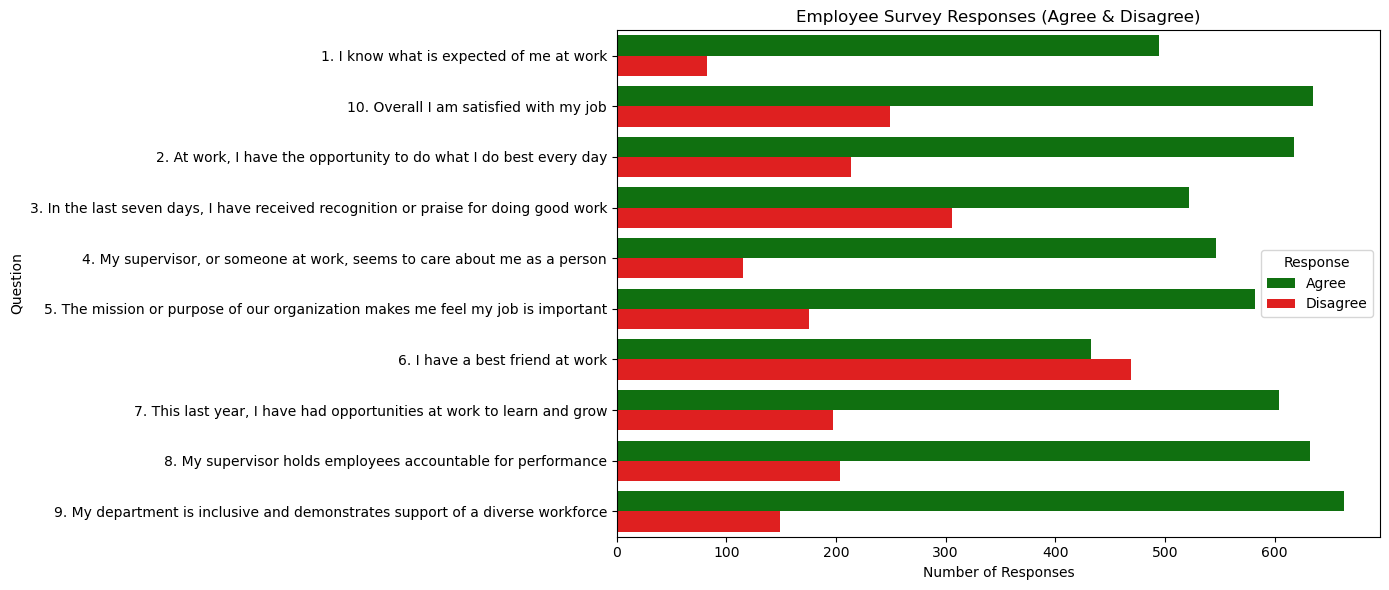

In [20]:
# 1. Which survey questions did respondents agree with or disagree with most?
# EDA to answer first question
filtered_responses = employee_df[employee_df['Response Text'].isin(['Agree', 'Disagree'])]

response_counts = filtered_responses.groupby(['Question', 'Response Text']).size().reset_index(name='Count')

plt.figure(figsize=(14, 6))
sns.barplot(data=response_counts, x='Count', y='Question', hue='Response Text', palette={'Agree': 'green', 'Disagree': 'red'})

plt.title('Employee Survey Responses (Agree & Disagree)')
plt.xlabel('Number of Responses')
plt.ylabel('Question')
plt.legend(title='Response')
plt.tight_layout()

plt.show()

Question number 9 had the highest number of 'agree' responses.  663 employees felt accepted and valued in a positive, solid, and collaborative work environment. Whereas question number 6 had the highest number of 'disagree' responses. 469 employees felt they did not have close friends or close colleagues in the office.

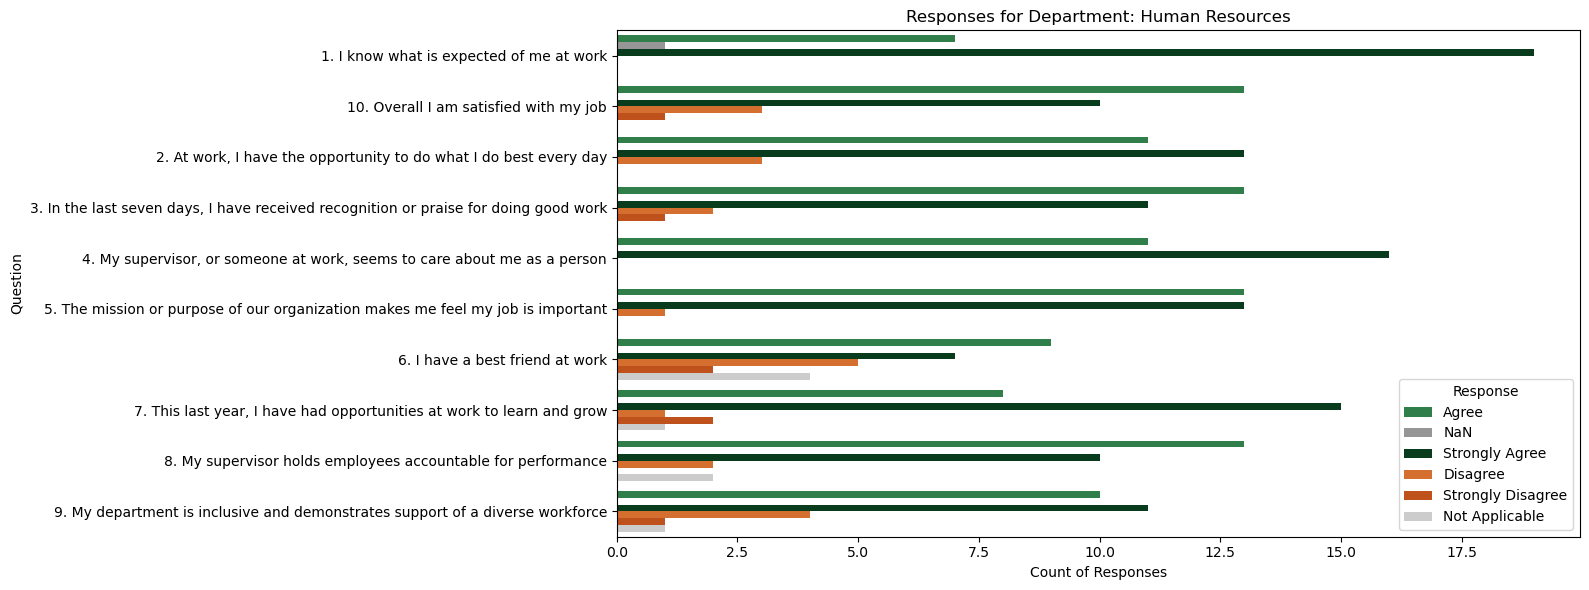

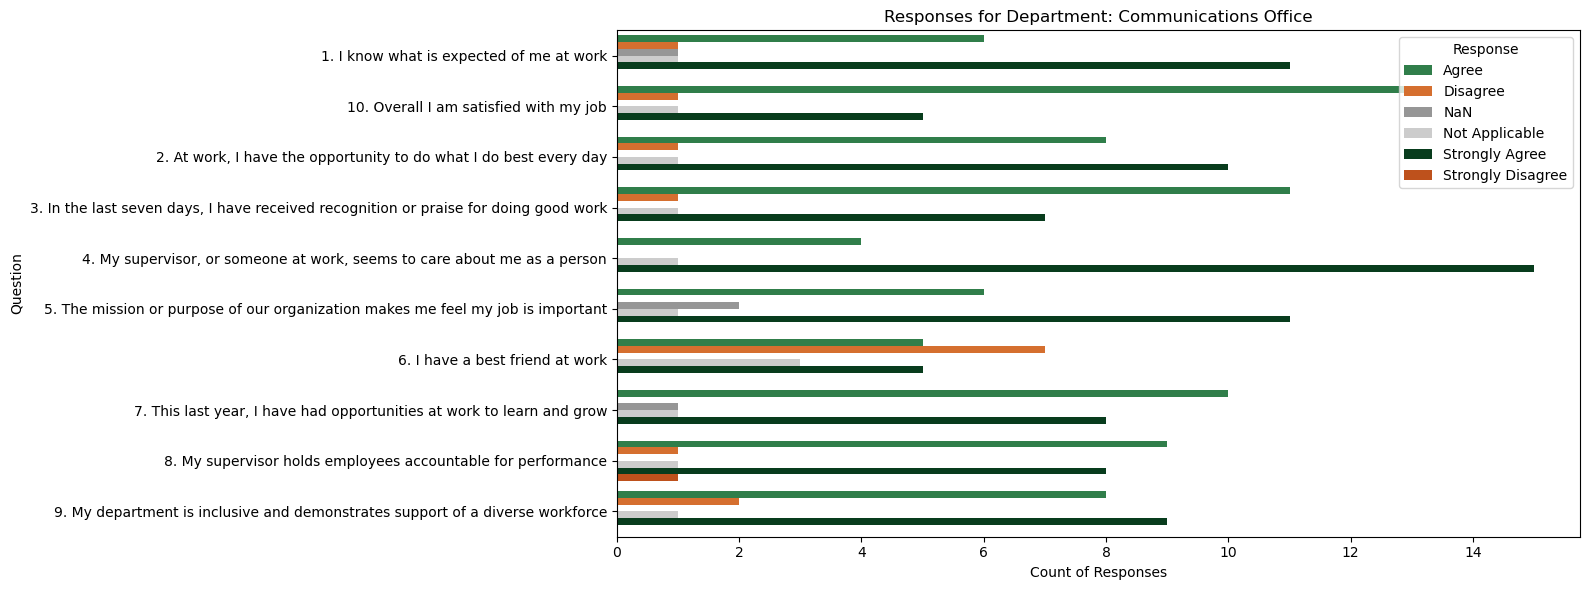

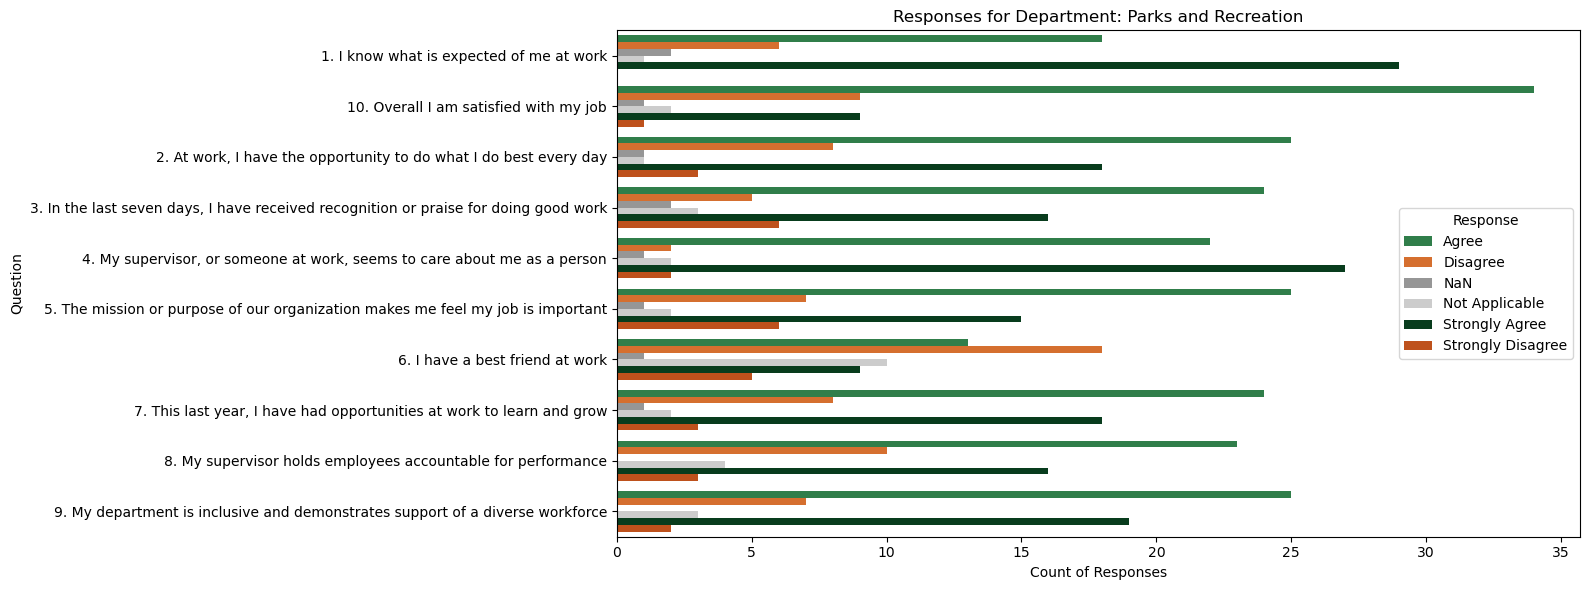

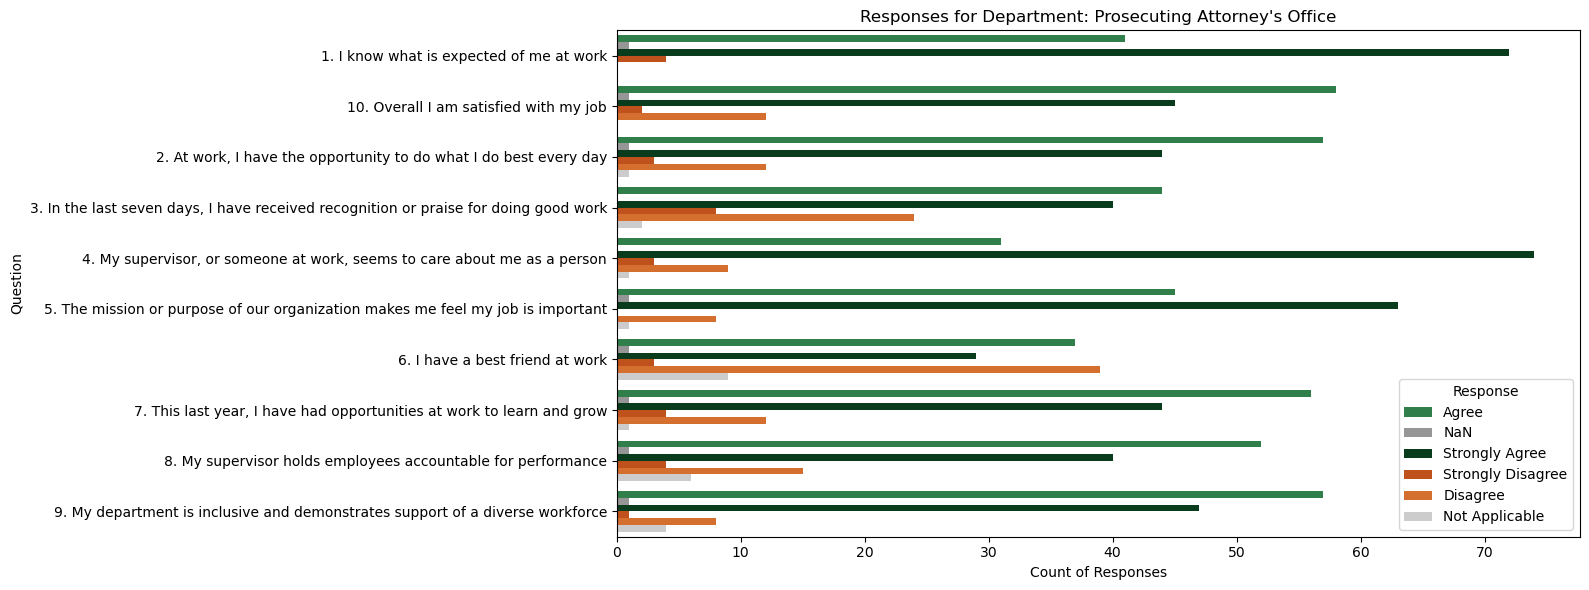

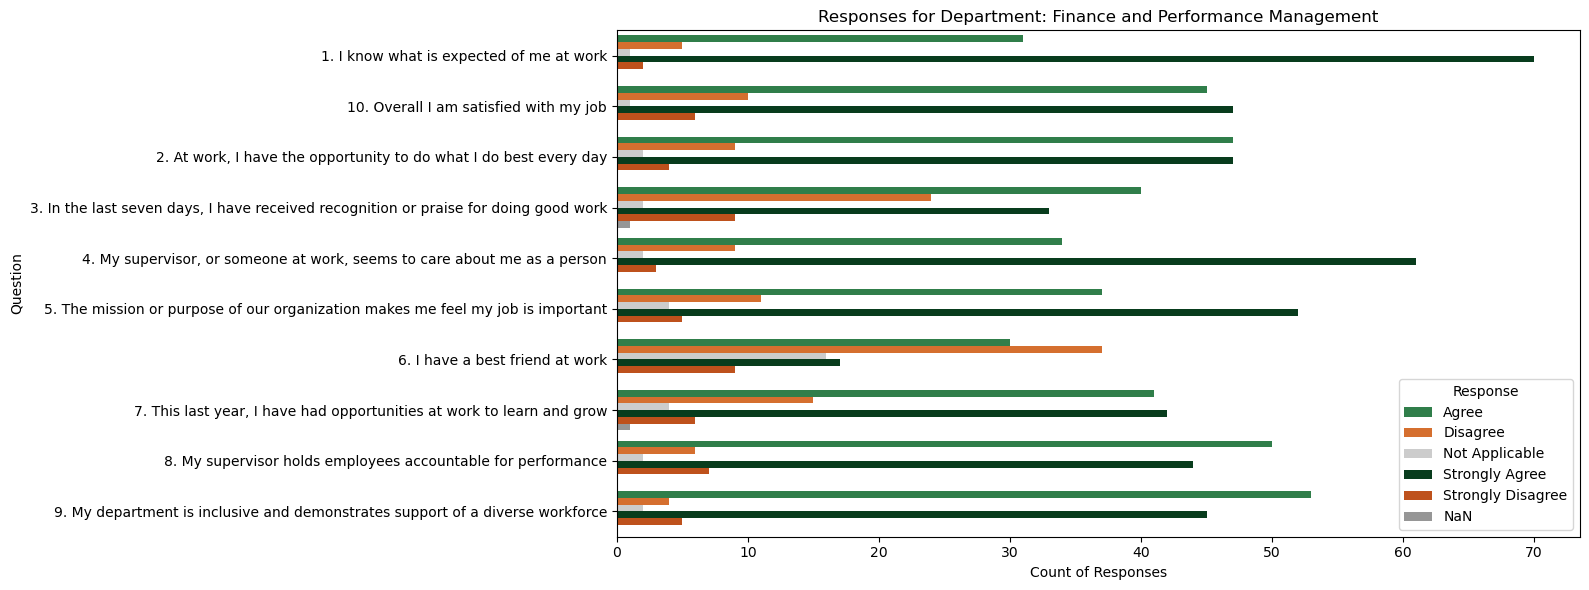

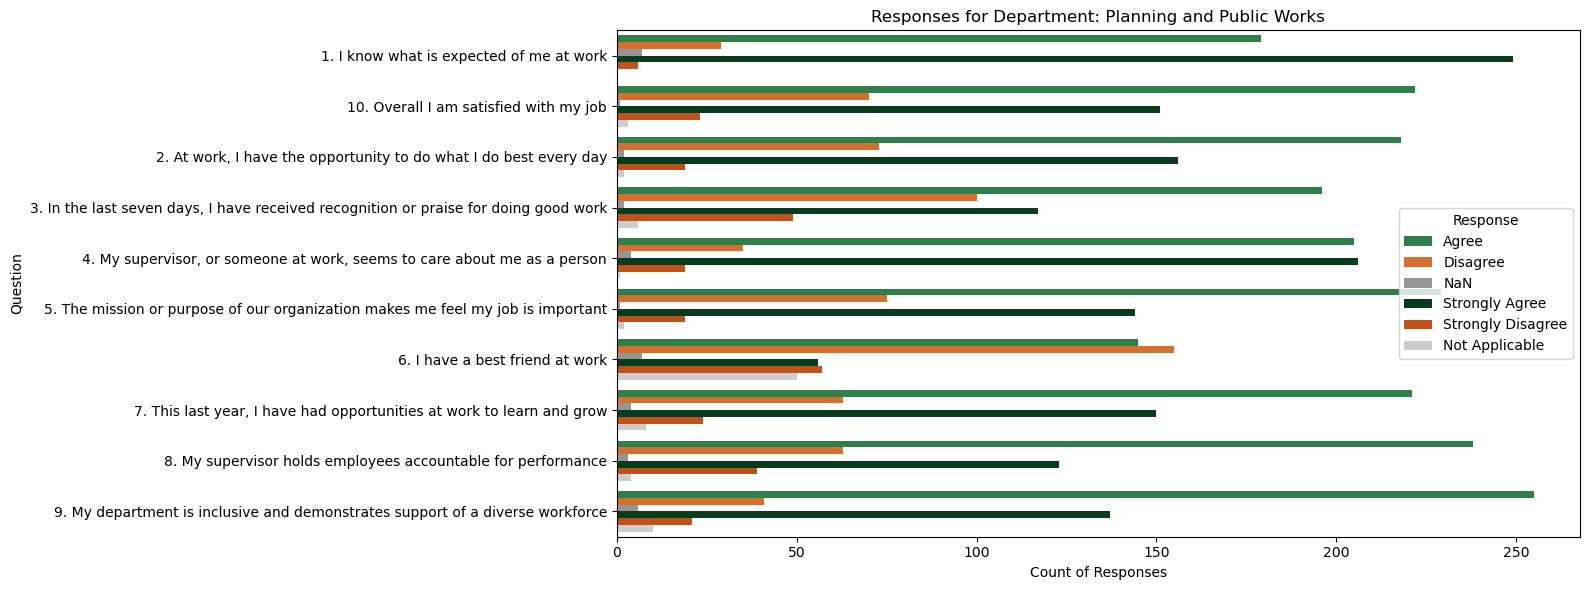

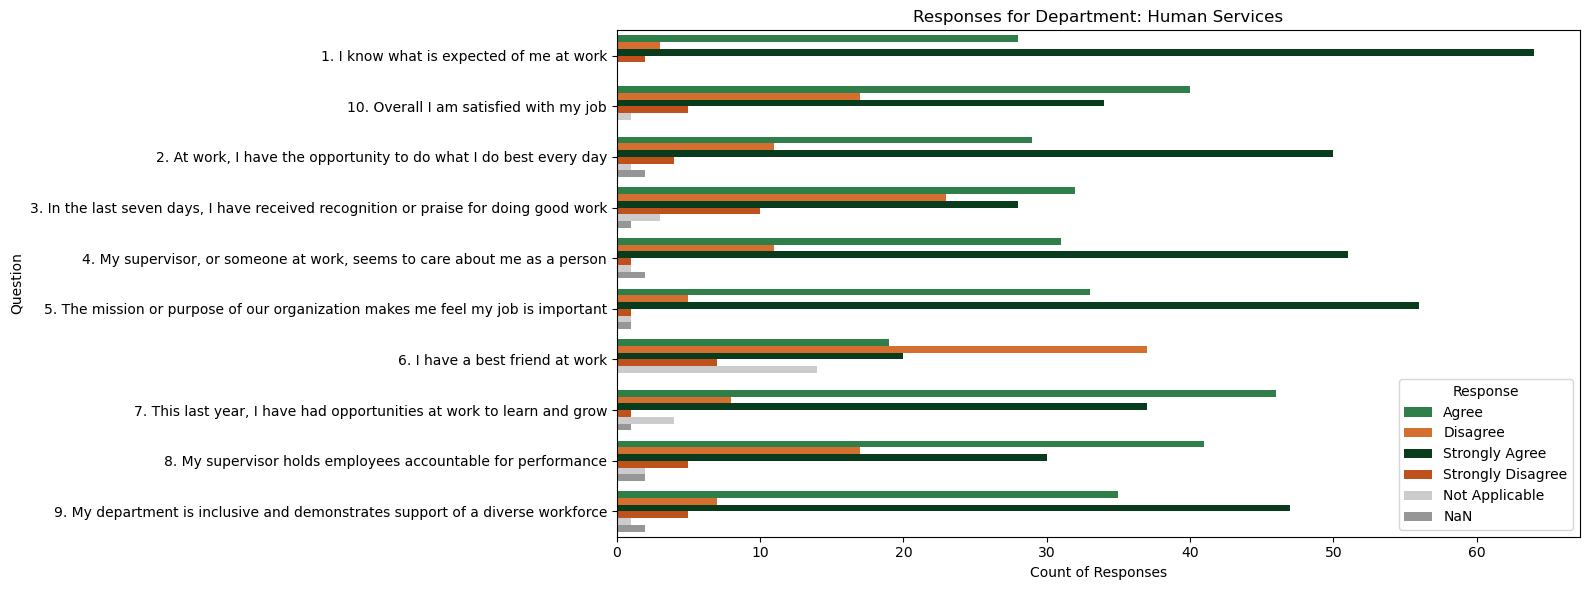

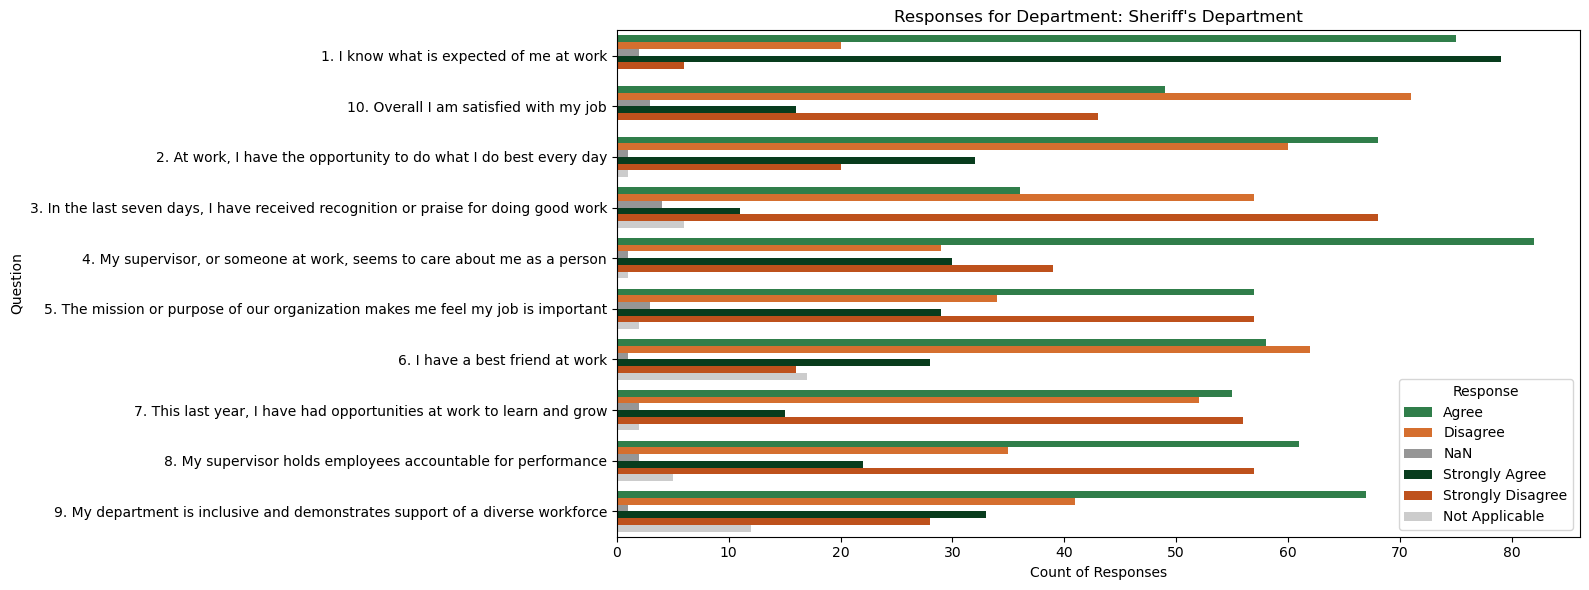

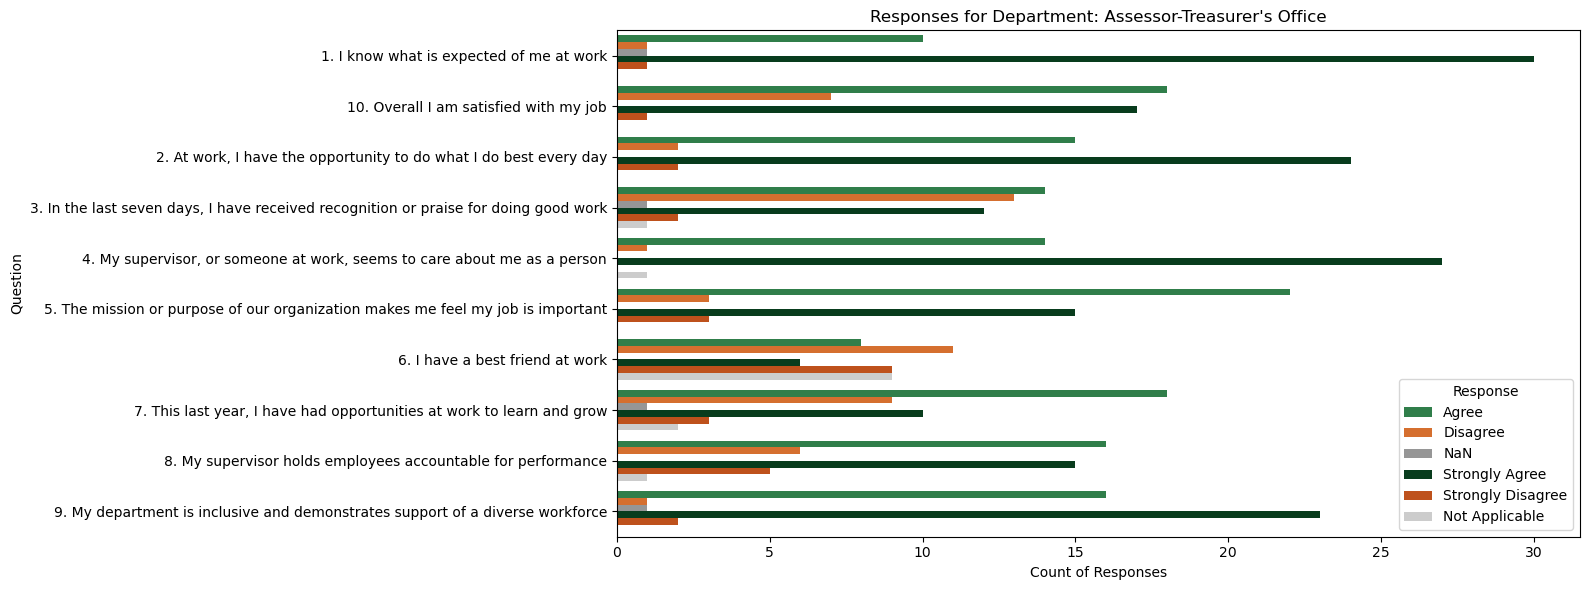

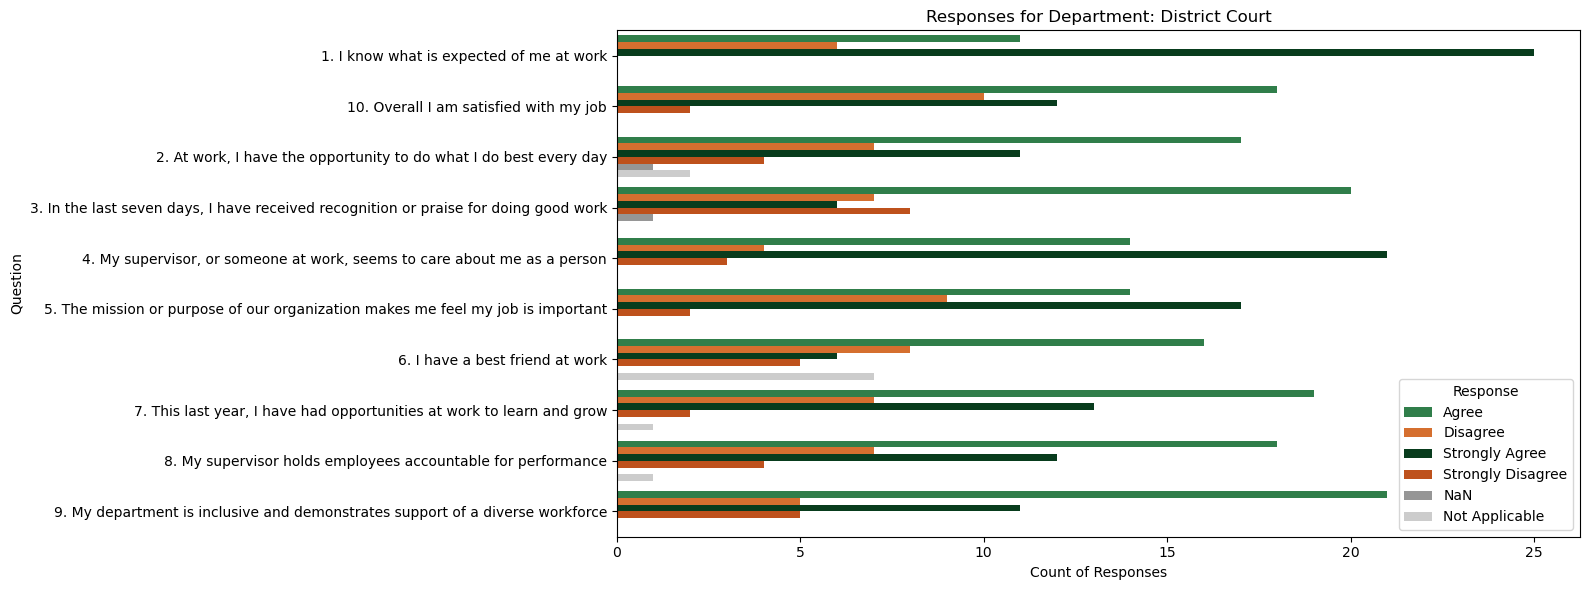

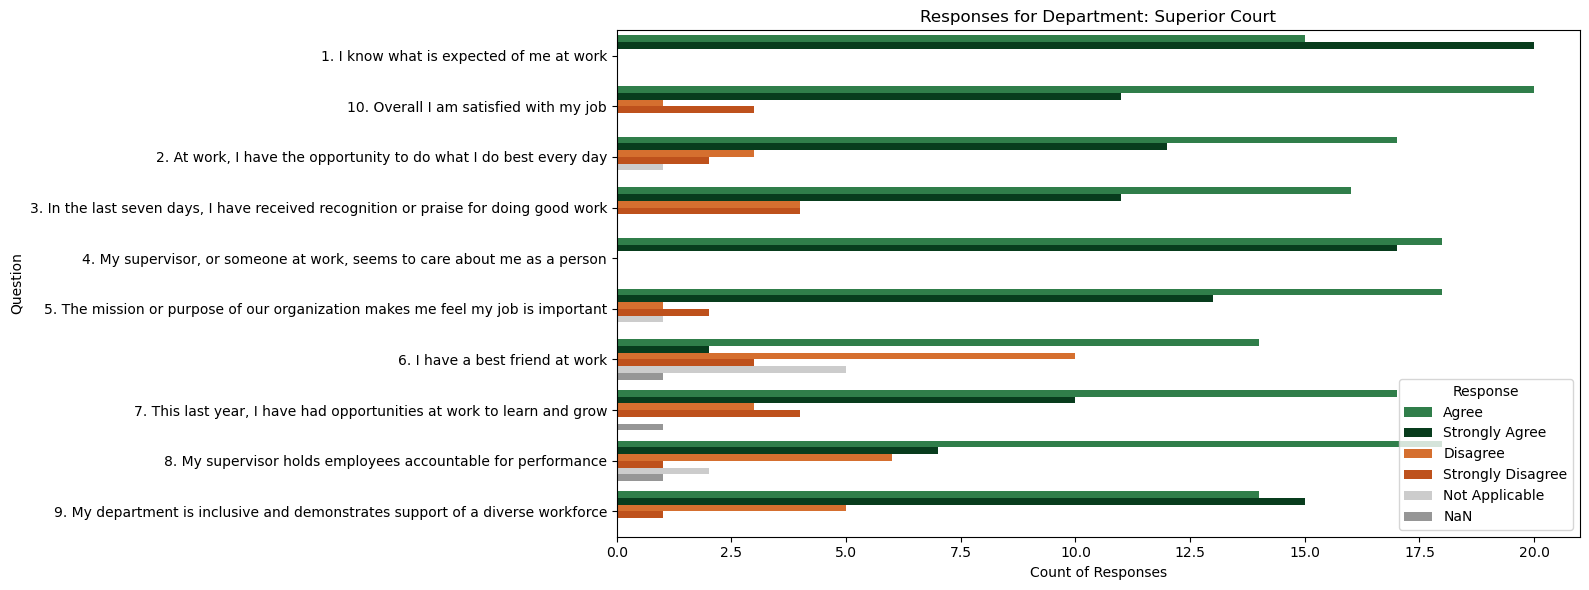

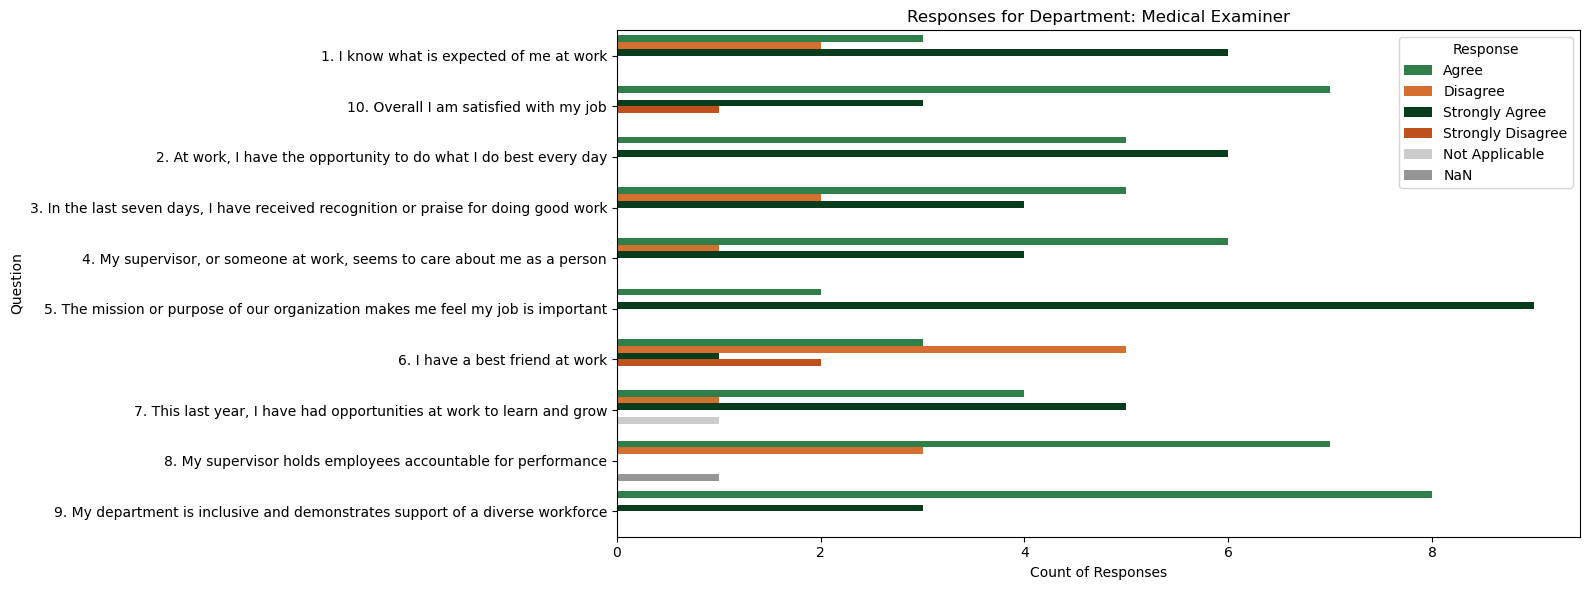

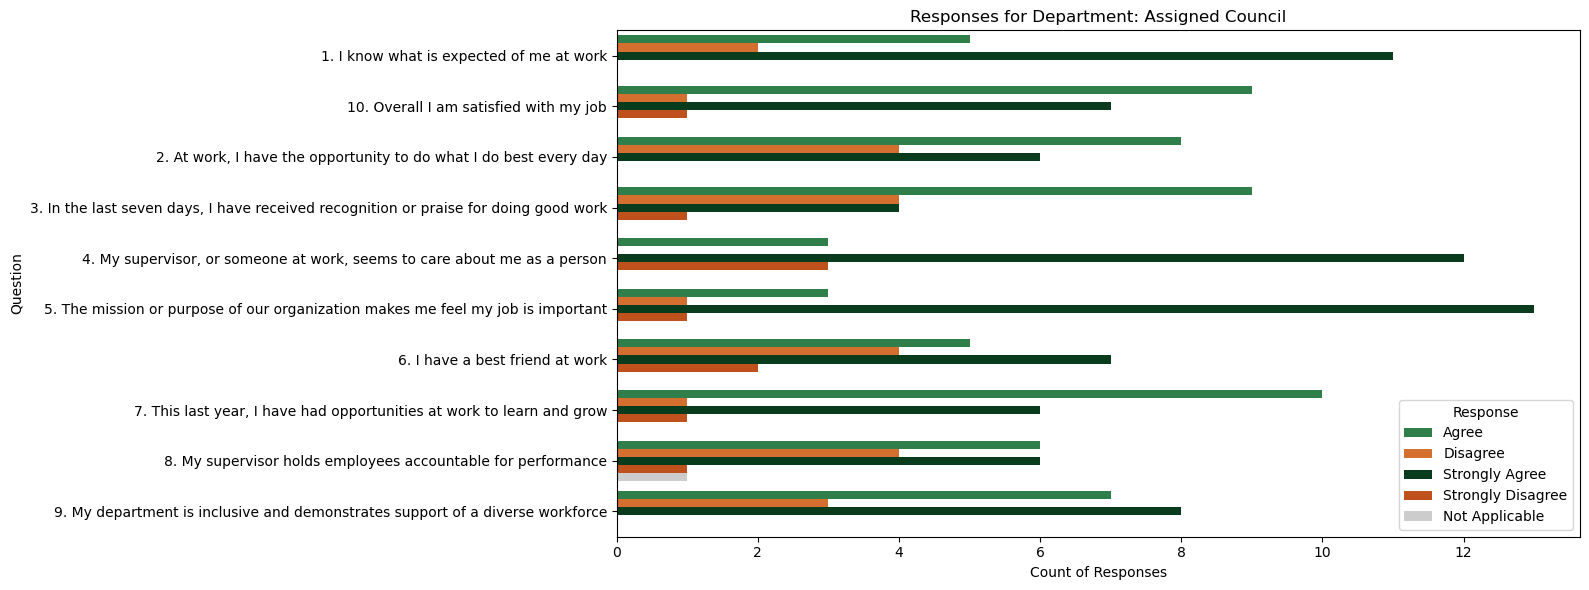

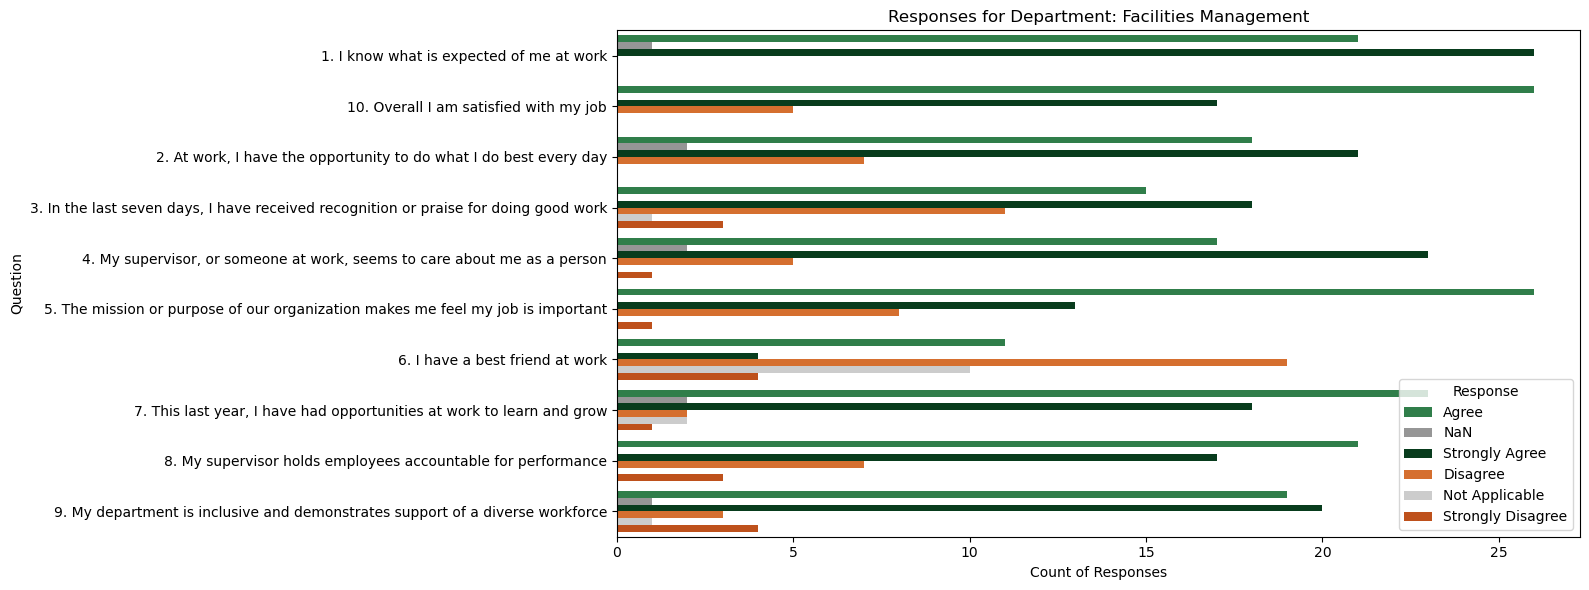

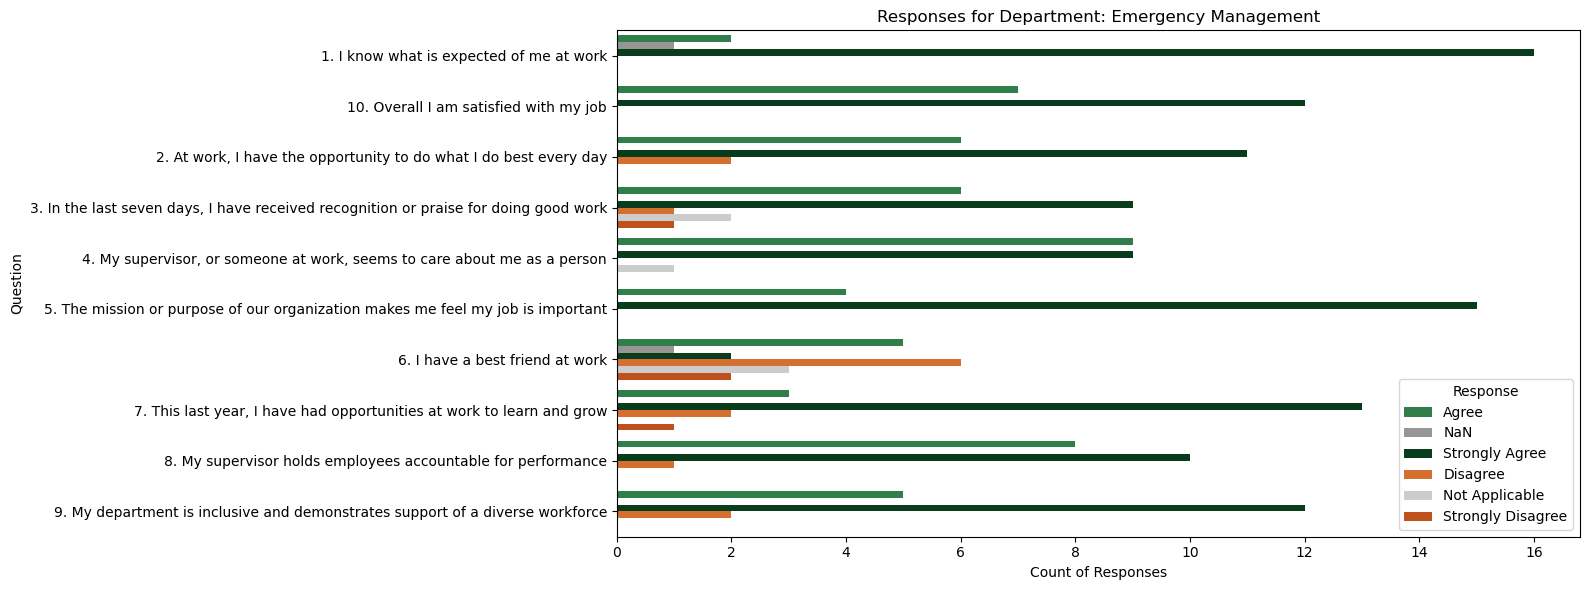

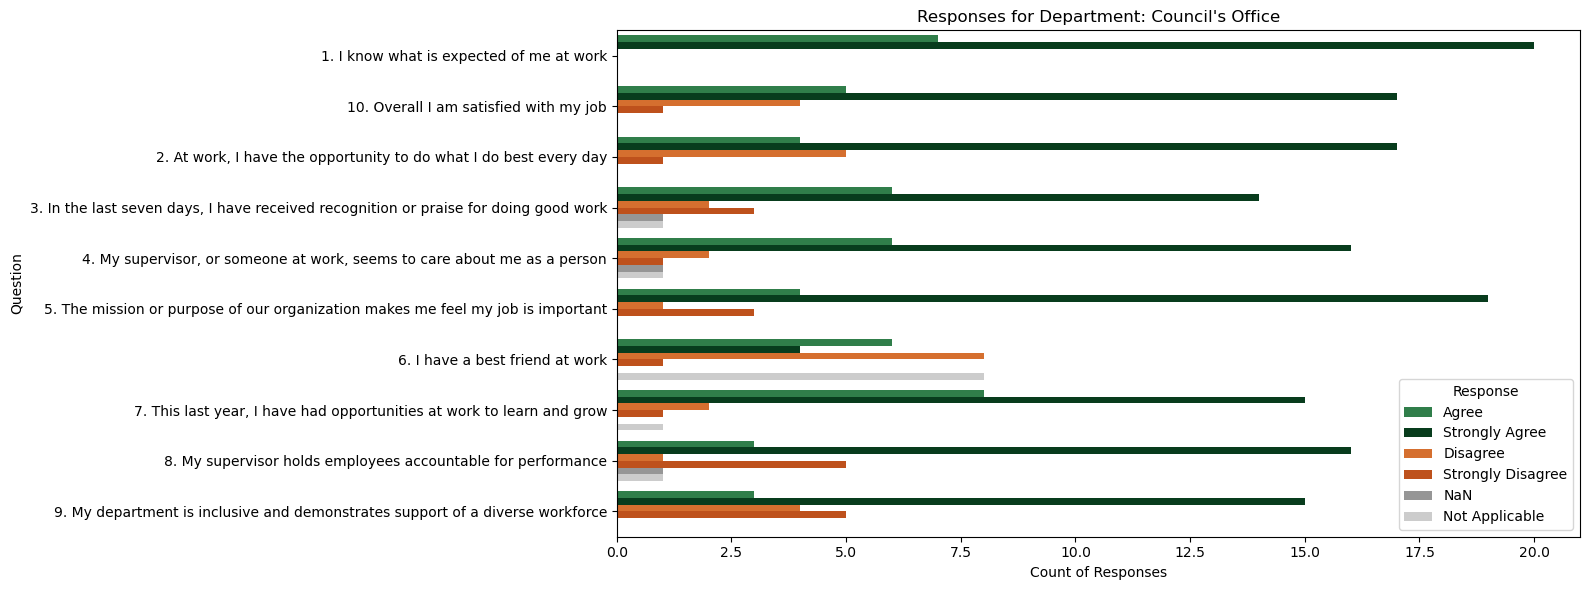

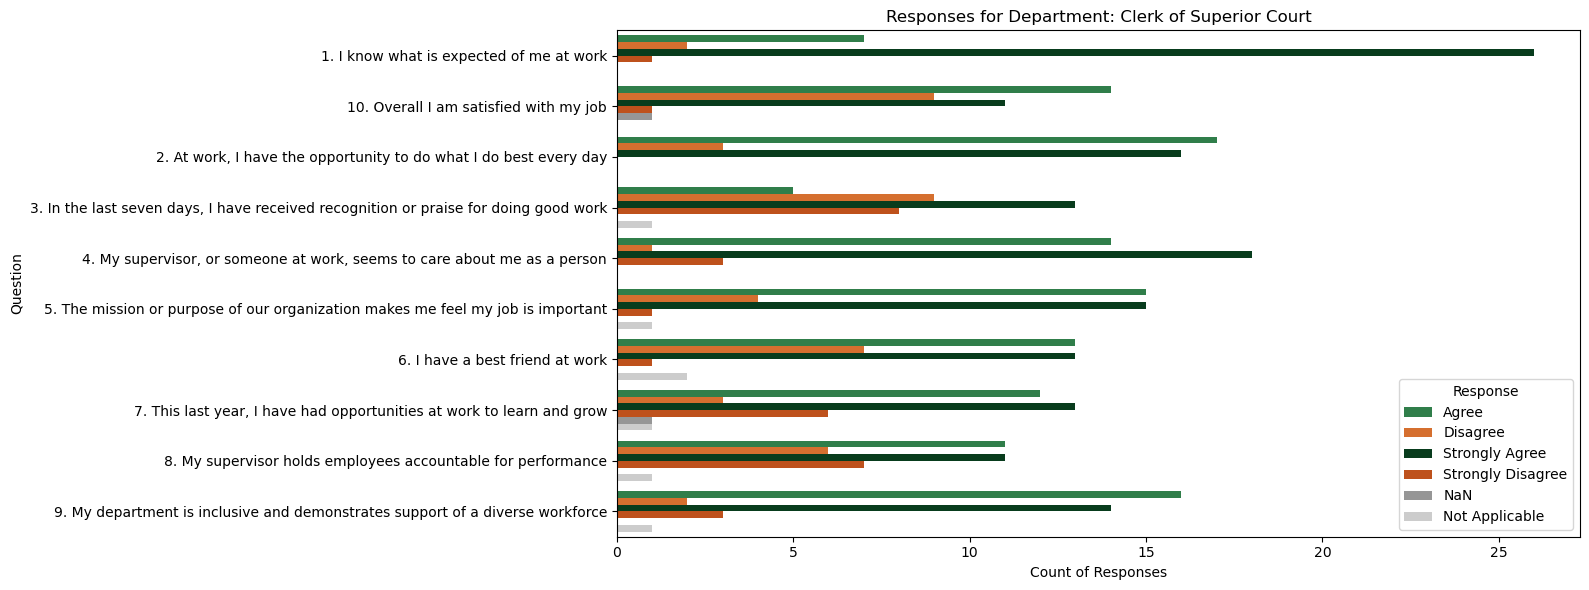

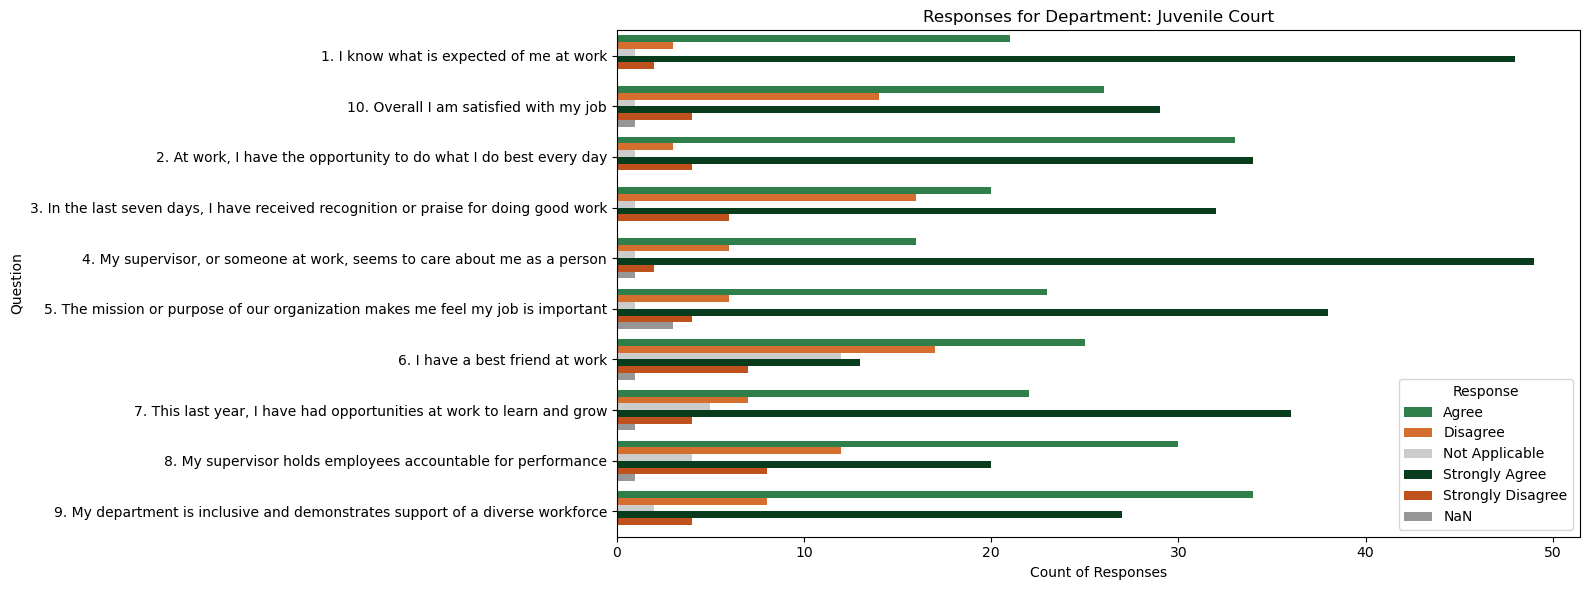

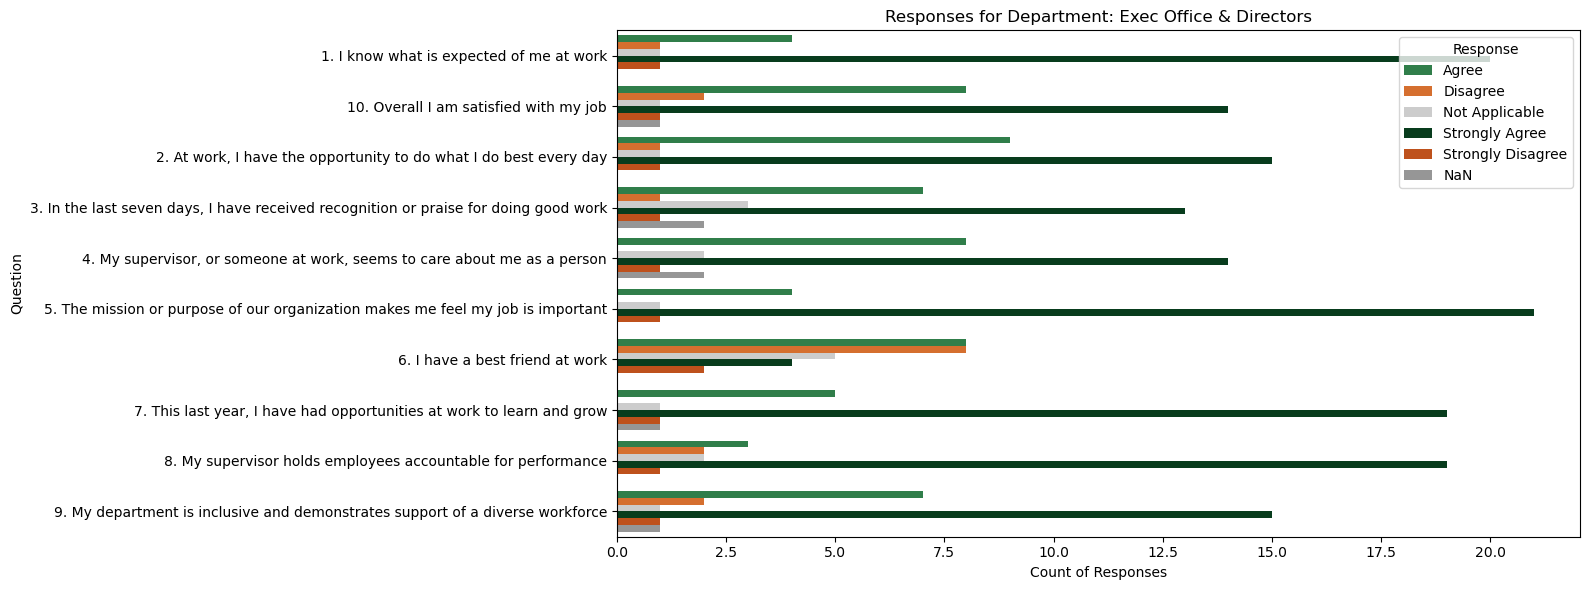

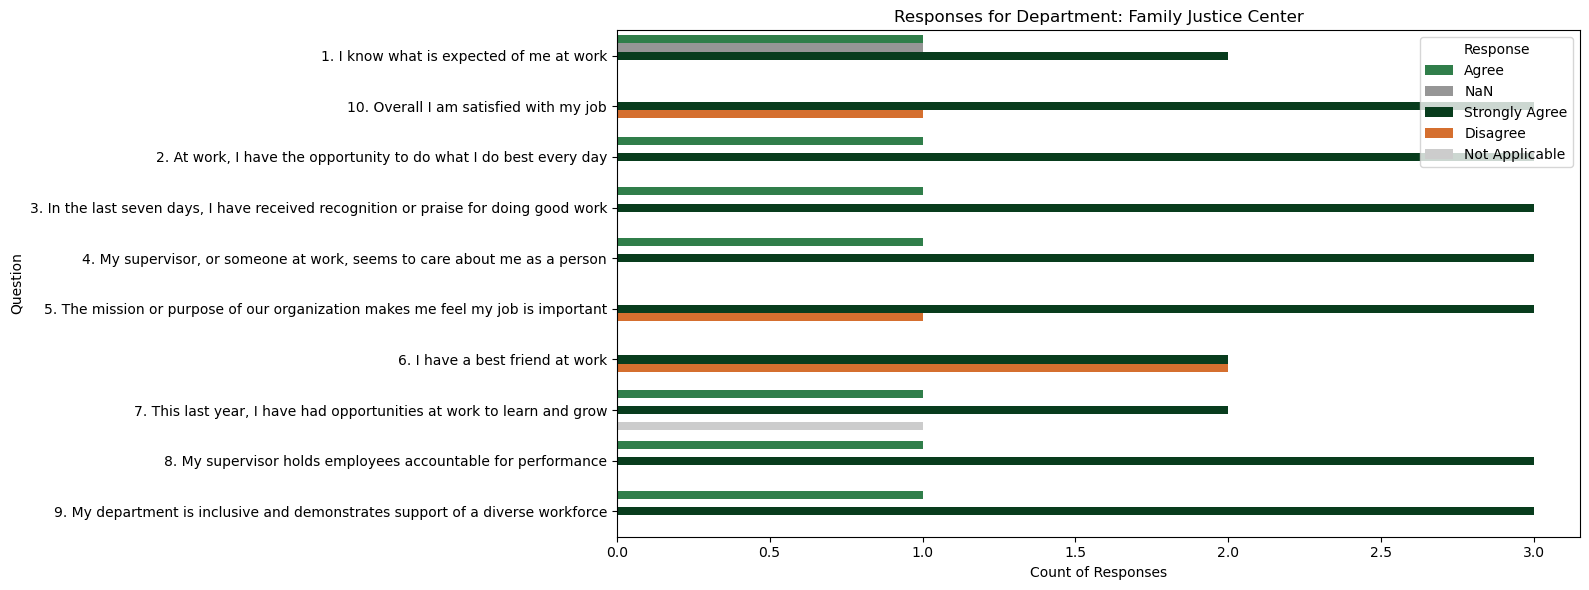

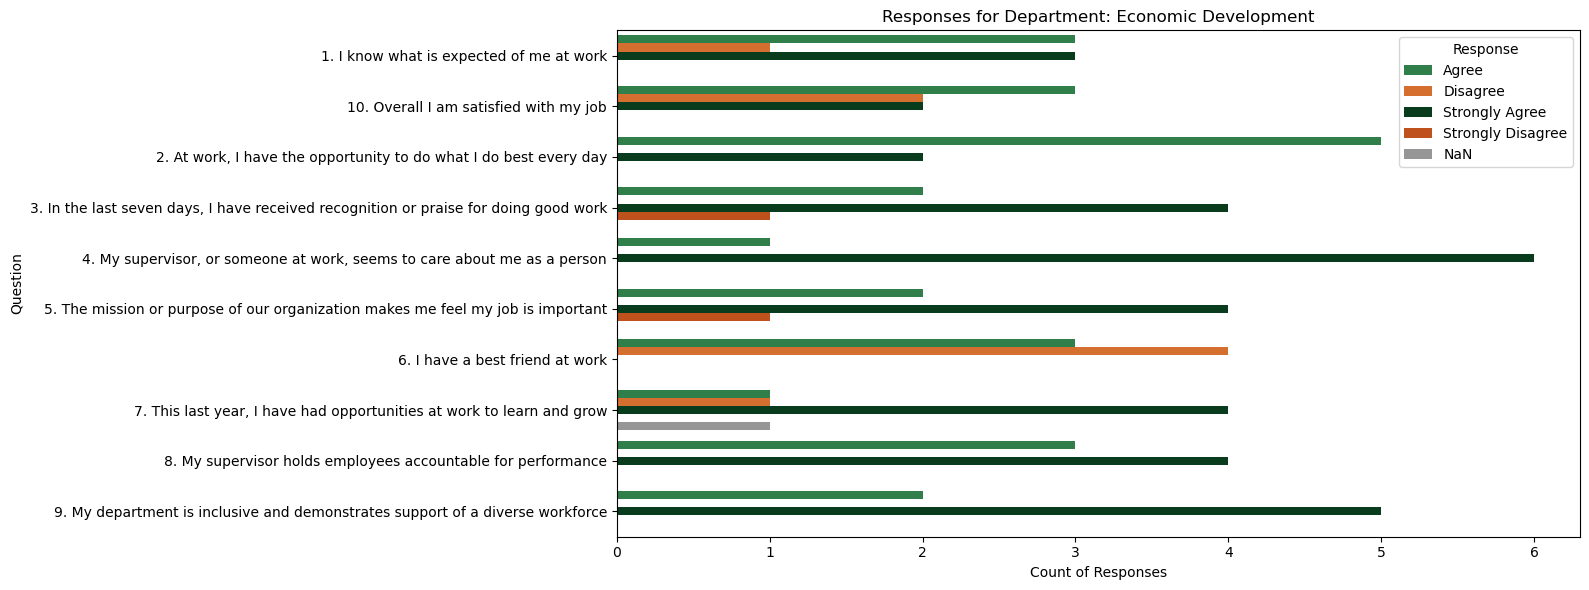

In [21]:
# 2. Do you see any patterns or trends by department or role?
# EDA to answer second question
response_counts = employee_df.groupby(['Department', 'Question', 'Response Text']).size().reset_index(name='Count')

departments = employee_df['Department'].unique()

palette_colors = {'Strongly Agree': '#00441b',
                  'Agree': '#238b45',
                  'Disagree': '#f16913',
                  'Strongly Disagree': '#d94801',
                  'Not Applicable': '#cccccc',
                  'NaN': '#969696'}
    
for department in departments:
    plt.figure(figsize=(16, 6))
    data = response_counts[response_counts['Department'] == department]
    sns.barplot(data=data, y='Question', x='Count', hue='Response Text', palette=palette_colors)
    plt.title(f'Responses for Department: {department}')
    plt.xlabel('Count of Responses')
    plt.ylabel('Question')
    plt.legend(title='Response')
    plt.tight_layout()
    plt.show()

- In general, almost all departments gave ratings of agree or strongly agree for all questions. However, in the Sheriff’s department, several questions received more disagree or strongly disagree ratings. These include questions like 'In the last seven days, I have received recognition or praise for doing good work,' 'I have a best friend at work,' and 'Overall, I am satisfied with my job.'

- 6 out of the 21 departments — Human Resources, District Court, Superior Court, Assigned Counsel, Clerk of Superior Court, and Juvenile Court — gave ratings of agree or strongly agree for the question 'I have a best friend at work.

### Conclusion
- In general, the survey results indicate that most departments have a positive assessment of inclusion and support for diversity in the workplace. However, it should be noted that the question about 'I have a best friend at work' received the highest number of 'disagree' responses overall, suggesting that this is an area that needs attention across the organization. Nevertheless, there are significant differences between departments. Six departments, namely Human Resources, District Court, Superior Court, Assigned Counsel, Clerk of Superior Court, and Juvenile Court, show closer relationships among employees. These differences may be due to differences in culture in each department, such as shared values, communication styles, and social norms.

- Special attention needs to be given to the Sheriff's Department, where several questions, including questions about 'In the last seven days, I have received recognition or praise for doing good work,' 'I have a best friend at work,' and 'Overall, I am satisfied with my job', received more 'disagree' or 'strongly disagree' responses. Further surveys are needed to identify the factors that cause these problems. Based on these findings, several actions can be considered to improve employee satisfaction and engagement. These actions include:
 1. Evaluating the employee reward system, both formal and non-formal.
 2. Providing briefings to supervisors on the importance of giving recognition and praise to employees, as well as how to do it effectively.
 3. Re-socializing employees regarding the functions of the Sheriff's Department in supporting the organization's vision, mission, and goals, so that employees feel involved in the organization.
 4. Providing opportunities for employees to improve their skills and knowledge by creating scheduled training programs.

In [23]:
# Save the preprocessed dataset
employee_df.to_excel('C:/Users/aniqo/Projects/Employee Survey/Employe_Survey_df.xlsx')